In [2]:
import numpy as np

X = 2 * (np.random.rand(100, 1))
y = 4 + 3 * X + (np.random.rand(100, 1))

(0, 14)

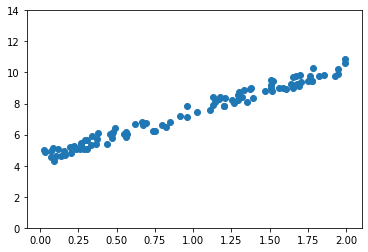

In [10]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.ylim(0, 14)


In [14]:
np.c_?

In [13]:
X_b = np.c_[np.ones((100, 1)), X]
X_b

array([[1.        , 0.82490191],
       [1.        , 0.56522961],
       [1.        , 1.50792604],
       [1.        , 1.13150047],
       [1.        , 0.25899109],
       [1.        , 0.19631378],
       [1.        , 1.9453619 ],
       [1.        , 1.78706235],
       [1.        , 1.60950262],
       [1.        , 1.1417065 ],
       [1.        , 1.13207225],
       [1.        , 0.47297757],
       [1.        , 1.16977259],
       [1.        , 0.0897865 ],
       [1.        , 0.47212739],
       [1.        , 1.77950072],
       [1.        , 1.74938248],
       [1.        , 1.32988192],
       [1.        , 1.67243336],
       [1.        , 1.30040432],
       [1.        , 0.11929776],
       [1.        , 0.30692875],
       [1.        , 1.50837952],
       [1.        , 0.43668679],
       [1.        , 0.15708043],
       [1.        , 0.96288293],
       [1.        , 0.36821019],
       [1.        , 0.56346324],
       [1.        , 0.16435462],
       [1.        , 0.45388036],
       [1.

In [18]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [19]:
theta_best

array([[4.52590199],
       [2.94586523]])

In [20]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.52590199],
       [10.41763244]])

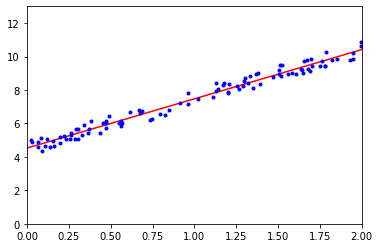

In [27]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 13])
plt.show()

In [29]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

y_predict = lin_reg.predict(X_new)

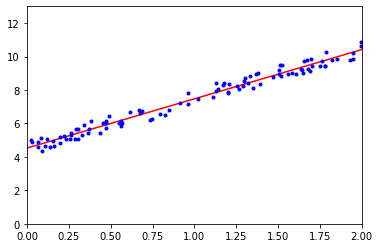

In [30]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 13])
plt.show()

In [43]:
print("Intercept: ", lin_reg.intercept_)
print("Coefficient: ", lin_reg.coef_)

print("Prediction at 0: ", lin_reg.intercept_ + lin_reg.coef_[0] * 0)
print("Prediction at 1: ", lin_reg.intercept_ + lin_reg.coef_[0] * 1)
print("Prediction at 2: ", lin_reg.intercept_ + lin_reg.coef_[0] * 2)


Intercept:  [4.52590199]
Coefficient:  [[2.94586523]]
Prediction at 0:  [4.52590199]
Prediction at 1:  [7.47176722]
Prediction at 2:  [10.41763244]


In [44]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd


array([[4.52590199],
       [2.94586523]])

In [45]:
np.linalg.pinv(X_b).dot(y)


array([[4.52590199],
       [2.94586523]])

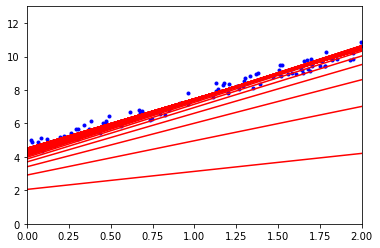

In [86]:
# Gradient Descent

eta = 0.1
n_iterations = 100
m = 100

theta = np.random.randn(2, 1)

plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 13])

for iteration in range(1, n_iterations + 1):
    gradients = (2 / m) * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
#     if (iteration == 1) | (iteration == 5) | (iteration == 10) | (iteration == 50) | (iteration == 1000):
#         print(theta)
        
    x1, y1 = [0, 2], [theta[0], 2 * theta[1] + theta[0]]


    plt.plot(x1, y1, "r-")
    
plt.show()


In [85]:
theta

array([[3.46779392],
       [3.73897146]])

In [94]:
# Gradient Descent
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        print(xi, yi)
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

[[1.        1.6436441]] [[9.22019658]]
[[1.         0.73459435]] [[6.20922435]]
[[1.         0.03080424]] [[4.89448753]]
[[1.         1.99422911]] [[10.62767489]]
[[1.         1.99460167]] [[10.8691342]]
[[1.         1.26473159]] [[8.04987615]]
[[1.         1.11190415]] [[7.5583641]]
[[1.         0.47212739]] [[6.05523685]]
[[1.         0.11929776]] [[5.05808172]]
[[1.         1.63860067]] [[9.27034226]]
[[1.         1.92889492]] [[9.80361582]]
[[1.         1.99422911]] [[10.62767489]]
[[1.         1.77950072]] [[9.43491415]]
[[1.         1.52221617]] [[9.47970109]]
[[1.         0.43668679]] [[5.42513068]]
[[1.         1.65444683]] [[9.71346662]]
[[1.         1.11190415]] [[7.5583641]]
[[1.         0.56346324]] [[5.84204446]]
[[1.         0.36340383]] [[5.40910729]]
[[1.         0.28910291]] [[5.05560658]]
[[1.         0.96288293]] [[7.16330628]]
[[1.         0.56346324]] [[5.84204446]]
[[1.         0.47297757]] [[6.1460208]]
[[1.         1.13150047]] [[8.39350234]]
[[1.         1.1697

[[1.       1.198906]] [[7.86566567]]
[[1.         1.69717574]] [[9.83274731]]
[[1.         0.47212739]] [[6.05523685]]
[[1.         0.33056562]] [[5.32150386]]
[[1.         1.77950072]] [[9.43491415]]
[[1.         1.94644083]] [[9.87825224]]
[[1.        1.6768821]] [[9.26618316]]
[[1.         1.29313393]] [[8.2152925]]
[[1.         1.60950262]] [[8.94246401]]
[[1.         0.68856051]] [[6.73896996]]
[[1.        0.0676983]] [[4.91539208]]
[[1.         1.39080227]] [[8.34460776]]
[[1.         0.11929776]] [[5.05808172]]
[[1.         0.96064818]] [[7.82710252]]
[[1.         1.50792604]] [[8.97263443]]
[[1.         0.28910291]] [[5.05560658]]
[[1.         1.69326854]] [[9.11212129]]
[[1.         0.54736374]] [[6.04245703]]
[[1.         1.82228011]] [[9.78958704]]
[[1.         1.77950072]] [[9.43491415]]
[[1.        1.9453619]] [[10.21618424]]
[[1.         0.30644292]] [[5.67327273]]
[[1.         0.22185913]] [[5.26292191]]
[[1.         0.23214898]] [[5.04688402]]
[[1.         1.74938248]] 

[[1.         0.74835266]] [[6.24608467]]
[[1.         0.36821019]] [[5.69369685]]
[[1.         0.30692875]] [[5.06116356]]
[[1.         0.26485225]] [[5.43393951]]
[[1.         1.99422911]] [[10.62767489]]
[[1.         1.37724698]] [[9.01776236]]
[[1.        1.3496477]] [[8.12493959]]
[[1.         1.13207225]] [[7.91264421]]
[[1.         1.69326854]] [[9.11212129]]
[[1.         0.73459435]] [[6.20922435]]
[[1.         0.06789108]] [[4.56312414]]
[[1.         1.74938248]] [[9.463074]]
[[1.         0.16435462]] [[4.67813913]]
[[1.         0.16435462]] [[4.67813913]]
[[1.         1.30040432]] [[8.71808362]]
[[1.        0.2003713]] [[4.84293359]]
[[1.        1.9453619]] [[10.21618424]]
[[1.         1.29313393]] [[8.2152925]]
[[1.         0.54736374]] [[6.04245703]]
[[1.         0.26344105]] [[5.30159787]]
[[1.         1.65086928]] [[9.01311758]]
[[1.         1.20663814]] [[8.34345147]]
[[1.         0.96064818]] [[7.82710252]]
[[1.         1.70304306]] [[9.41512632]]
[[1.         0.08368951

[[1.         0.22185913]] [[5.26292191]]
[[1.         0.33056562]] [[5.32150386]]
[[1.         1.51766423]] [[8.82498071]]
[[1.        0.0676983]] [[4.91539208]]
[[1.         1.13150047]] [[8.39350234]]
[[1.         1.78706235]] [[10.27118009]]
[[1.         0.36340383]] [[5.40910729]]
[[1.         0.08368951]] [[5.10695501]]
[[1.         0.26485225]] [[5.43393951]]
[[1.         0.38034116]] [[6.12338379]]
[[1.         1.30040432]] [[8.71808362]]
[[1.         1.16977259]] [[8.28459888]]
[[1.         0.16435462]] [[4.67813913]]
[[1.         0.82490191]] [[6.51208935]]
[[1.         1.50792604]] [[8.97263443]]
[[1.         1.02408312]] [[7.4391573]]
[[1.         1.77950072]] [[9.43491415]]
[[1.         0.74835266]] [[6.24608467]]
[[1.        0.8489797]] [[6.79754532]]
[[1.         1.94644083]] [[9.87825224]]
[[1.         0.02153124]] [[4.98754149]]
[[1.         0.30692875]] [[5.06116356]]
[[1.         0.30644292]] [[5.67327273]]
[[1.        1.2021691]] [[7.81466332]]
[[1.         1.3004043

[[1.         0.68856051]] [[6.73896996]]
[[1.         1.55947825]] [[8.98103225]]
[[1.         0.54736374]] [[6.04245703]]
[[1.         0.66648632]] [[6.8086056]]
[[1.         1.52221617]] [[9.47970109]]
[[1.         0.02153124]] [[4.98754149]]
[[1.         0.26485225]] [[5.43393951]]
[[1.         1.99422911]] [[10.62767489]]
[[1.         1.11190415]] [[7.5583641]]
[[1.         1.17612852]] [[8.41541602]]
[[1.         0.82490191]] [[6.51208935]]
[[1.        1.3496477]] [[8.12493959]]
[[1.         1.69326854]] [[9.11212129]]
[[1.         1.82228011]] [[9.78958704]]
[[1.         0.08368951]] [[5.10695501]]
[[1.        1.2021691]] [[7.81466332]]
[[1.         0.47212739]] [[6.05523685]]
[[1.         1.31809677]] [[8.39001895]]
[[1.         0.26485225]] [[5.43393951]]
[[1.         0.96288293]] [[7.16330628]]
[[1.         1.92889492]] [[9.80361582]]
[[1.         0.61694405]] [[6.67286961]]
[[1.         1.92889492]] [[9.80361582]]
[[1.         1.63860067]] [[9.27034226]]
[[1.         1.697175

[[1.         1.13207225]] [[7.91264421]]
[[1.         1.99460167]] [[10.8691342]]
[[1.         1.51258535]] [[9.50359656]]
[[1.         0.66648632]] [[6.8086056]]
[[1.         0.33056562]] [[5.32150386]]
[[1.        1.3496477]] [[8.12493959]]
[[1.         1.50837952]] [[9.17822699]]
[[1.         0.30644292]] [[5.67327273]]
[[1.         0.15708043]] [[4.95504659]]
[[1.         1.11190415]] [[7.5583641]]
[[1.         1.16977259]] [[8.28459888]]
[[1.         0.43668679]] [[5.42513068]]
[[1.         0.36340383]] [[5.40910729]]
[[1.         0.26485225]] [[5.43393951]]
[[1.         1.74938248]] [[9.463074]]
[[1.         1.13207225]] [[7.91264421]]
[[1.         1.13207225]] [[7.91264421]]
[[1.         1.78706235]] [[10.27118009]]
[[1.         0.45388036]] [[6.02653193]]
[[1.        1.2021691]] [[7.81466332]]
[[1.         1.69717574]] [[9.83274731]]
[[1.         1.70304306]] [[9.41512632]]
[[1.         0.61694405]] [[6.67286961]]
[[1.         0.56153838]] [[6.14831902]]
[[1.        0.8489797]]

[[1.        1.2021691]] [[7.81466332]]
[[1.         1.29557117]] [[8.52250097]]
[[1.         1.32988192]] [[8.84481344]]
[[1.         1.50792604]] [[8.97263443]]
[[1.         0.38034116]] [[6.12338379]]
[[1.         0.08368951]] [[5.10695501]]
[[1.         0.08368951]] [[5.10695501]]
[[1.         1.69717574]] [[9.83274731]]
[[1.         1.52221617]] [[9.47970109]]
[[1.         0.47212739]] [[6.05523685]]
[[1.         1.69326854]] [[9.11212129]]
[[1.         1.82228011]] [[9.78958704]]
[[1.         0.26344105]] [[5.30159787]]
[[1.         0.82490191]] [[6.51208935]]
[[1.         0.74835266]] [[6.24608467]]
[[1.        0.8489797]] [[6.79754532]]
[[1.         1.37724698]] [[9.01776236]]
[[1.         1.76386345]] [[9.76251652]]
[[1.         1.78706235]] [[10.27118009]]
[[1.         1.60950262]] [[8.94246401]]
[[1.         0.33056562]] [[5.32150386]]
[[1.        0.0897865]] [[4.33242337]]
[[1.         0.45388036]] [[6.02653193]]
[[1.         0.26485225]] [[5.43393951]]
[[1.         1.703043

[[1.         1.50792604]] [[8.97263443]]
[[1.        0.8489797]] [[6.79754532]]
[[1.         0.33056562]] [[5.32150386]]
[[1.         0.67470246]] [[6.60945375]]
[[1.         1.63860067]] [[9.27034226]]
[[1.         0.56522961]] [[6.01058244]]
[[1.         0.33056562]] [[5.32150386]]
[[1.         0.61694405]] [[6.67286961]]
[[1.         1.77823142]] [[9.4583709]]
[[1.         0.79479461]] [[6.59410419]]
[[1.         1.51766423]] [[8.82498071]]
[[1.        1.3496477]] [[8.12493959]]
[[1.         1.17612852]] [[8.41541602]]
[[1.         1.29557117]] [[8.52250097]]
[[1.         1.60950262]] [[8.94246401]]
[[1.         0.96064818]] [[7.82710252]]
[[1.         0.82490191]] [[6.51208935]]
[[1.         0.36821019]] [[5.69369685]]
[[1.        0.2003713]] [[4.84293359]]
[[1.         1.37078763]] [[8.96681161]]
[[1.         1.50792604]] [[8.97263443]]
[[1.         1.16977259]] [[8.28459888]]
[[1.         1.13207225]] [[7.91264421]]
[[1.         1.55947825]] [[8.98103225]]
[[1.         1.67243336

[[1.         0.34073761]] [[5.88411783]]
[[1.         1.37724698]] [[9.01776236]]
[[1.         1.51258535]] [[9.50359656]]
[[1.         0.36340383]] [[5.40910729]]
[[1.        0.0676983]] [[4.91539208]]
[[1.         0.34073761]] [[5.88411783]]
[[1.         1.63860067]] [[9.27034226]]
[[1.         1.39080227]] [[8.34460776]]
[[1.         0.56346324]] [[5.84204446]]
[[1.         0.11929776]] [[5.05808172]]
[[1.       1.198906]] [[7.86566567]]
[[1.         1.52221617]] [[9.47970109]]
[[1.         1.51258535]] [[9.50359656]]
[[1.         0.06789108]] [[4.56312414]]
[[1.         0.47297757]] [[6.1460208]]
[[1.         1.77823142]] [[9.4583709]]
[[1.         0.45388036]] [[6.02653193]]
[[1.         1.37078763]] [[8.96681161]]
[[1.         0.73459435]] [[6.20922435]]
[[1.         0.26344105]] [[5.30159787]]
[[1.         0.67470246]] [[6.60945375]]
[[1.         1.37724698]] [[9.01776236]]
[[1.        1.2021691]] [[7.81466332]]
[[1.         1.50792604]] [[8.97263443]]
[[1.         0.54736374]] 

In [91]:
theta

array([[4.53565298],
       [2.93508832]])

In [95]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [96]:
sgd_reg.intercept_, sgd_reg.coef_


(array([4.50580816]), array([2.93833866]))

In [97]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

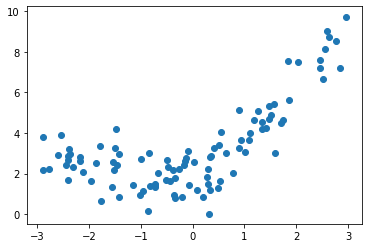

In [99]:
plt.scatter(X, y)

In [100]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]


array([-2.76979484])

In [101]:
X_poly[0]


array([-2.76979484,  7.67176347])

In [102]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_


(array([2.10416526]), array([[0.95851307, 0.50466196]]))